# Imports

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

# Dataset Creation

In [2]:
features_cols = ['X','Y']
label_col = 'LABEL'

cords_df = pd.DataFrame([[5,0,'Low'], [9,3,'Low'], [8,5,'Low'], [12,8,'Low'], [3,0,'Low'],
                         [1,6,'High'], [5,9,'High'], [0,4,'High'], [9,15,'High'], [7,11,'High']],
                         columns=['X','Y','LABEL'])
cords_df

,X,Y,LABEL
0,5,0,Low
1,9,3,Low
2,8,5,Low
3,12,8,Low
4,3,0,Low
5,1,6,High
6,5,9,High
7,0,4,High
8,9,15,High
9,7,11,High


# Experiment Examples

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from automl_infrastructure.classifiers.adapters import SklearnClassifierAdapter
from automl_infrastructure.classifiers import EnsembleClassifier
from automl_infrastructure.experiment import Experiment
from automl_infrastructure.experiment.observations import Avg, Std
from automl_infrastructure.experiment.params import RangedParameter, ListParameter
from automl_infrastructure.visualization import ConfusionMatrix

# Simple Modeling & Evaluation Without Hyper-Param Optimization

C:\Users\Barak\.conda\envs\DSEnv\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Experiment's name: experiment1.
Start time: 08:51:46 - 14/06/20.
End time: 08:51:50 - 14/06/20.
Num of folds: 3.
Num of k-folds repetitions: 5.

---------------------------------------------------------
Model name: lr.
Score: 0.9777777777777777.

Best hyper-parameters: {}.

Train's observations:


,CLASS,avg_precision,std_precision,avg_recall,std_recall
0,High,1.0,0.0,1.0,0.0
1,Low,1.0,0.0,1.0,0.0



Train's visualizations:
confusion_matrix:


C:\Users\Barak\.conda\envs\DSEnv\lib\site-packages\automl_infrastructure\visualization\confusion_matrix.py:71: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)
C:\Users\Barak\.conda\envs\DSEnv\lib\site-packages\automl_infrastructure\visualization\confusion_matrix.py:101: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


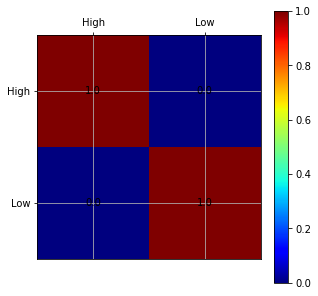


Test's observations:


,CLASS,avg_precision,std_precision,avg_recall,std_recall
0,High,1.000000,0.000000,0.966667,0.124722
1,Low,0.966667,0.124722,1.000000,0.000000


Test's visualizations:
confusion_matrix:


C:\Users\Barak\.conda\envs\DSEnv\lib\site-packages\automl_infrastructure\visualization\confusion_matrix.py:71: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)
C:\Users\Barak\.conda\envs\DSEnv\lib\site-packages\automl_infrastructure\visualization\confusion_matrix.py:101: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


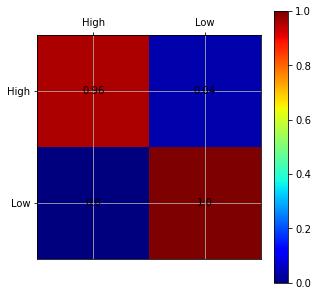



---------------------------------------------------------
Model name: rf.
Score: 0.6277777777777778.

Best hyper-parameters: {}.

Train's observations:


,CLASS,avg_precision,std_precision,avg_recall,std_recall
0,High,1.0,0.0,1.0,0.0
1,Low,1.0,0.0,1.0,0.0



Train's visualizations:
confusion_matrix:


C:\Users\Barak\.conda\envs\DSEnv\lib\site-packages\automl_infrastructure\visualization\confusion_matrix.py:71: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)
C:\Users\Barak\.conda\envs\DSEnv\lib\site-packages\automl_infrastructure\visualization\confusion_matrix.py:101: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


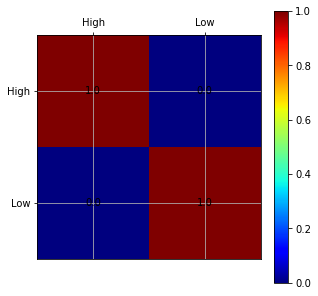


Test's observations:


,CLASS,avg_precision,std_precision,avg_recall,std_recall
0,High,0.633333,0.345339,0.700000,0.355903
1,Low,0.544444,0.367507,0.633333,0.385861


Test's visualizations:
confusion_matrix:


C:\Users\Barak\.conda\envs\DSEnv\lib\site-packages\automl_infrastructure\visualization\confusion_matrix.py:71: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)
C:\Users\Barak\.conda\envs\DSEnv\lib\site-packages\automl_infrastructure\visualization\confusion_matrix.py:101: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


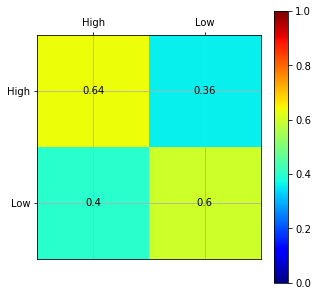



---------------------------------------------------------


In [4]:
# create models we want to examine
lr_model = SklearnClassifierAdapter(name='lr', sklearn_model=LogisticRegression())
rf_model = SklearnClassifierAdapter(name='rf', sklearn_model=RandomForestClassifier())


experiment = Experiment('experiment1', cords_df[features_cols], cords_df[label_col], 
                models=[lr_model, rf_model],
                observations={
                    'avg_precision': Avg(metric='precision'),
                    'std_precision': Std(metric='precision'),
                    'avg_recall': Avg(metric='recall'),
                    'std_recall': Std(metric='recall')
                },
                visualizations={
                    'confusion_matrix': ConfusionMatrix(figsize=(5,5))
                },
                objective='accuracy'
            )

experiment.run(n_jobs=1)
experiment.print_report(print_func=display)

# Simple Modeling & Evaluation With Hyper-Param Optimization

[I 2020-06-14 11:51:59,968] Finished trial#0 with value: 0.611111111111111 with parameters: {'max_depth_30992': 6, 'n_estimators_94168': 100}. Best is trial#0 with value: 0.611111111111111.
[I 2020-06-14 11:52:00,589] Finished trial#1 with value: 0.5833333333333333 with parameters: {'max_depth_30992': 2, 'n_estimators_94168': 20}. Best is trial#0 with value: 0.611111111111111.
[I 2020-06-14 11:52:01,220] Finished trial#2 with value: 0.7222222222222222 with parameters: {'max_depth_30992': 4, 'n_estimators_94168': 20}. Best is trial#2 with value: 0.7222222222222222.
[I 2020-06-14 11:52:03,689] Finished trial#3 with value: 0.49999999999999994 with parameters: {'max_depth_30992': 4, 'n_estimators_94168': 100}. Best is trial#2 with value: 0.7222222222222222.
[I 2020-06-14 11:52:04,921] Finished trial#4 with value: 0.6666666666666666 with parameters: {'max_depth_30992': 6, 'n_estimators_94168': 50}. Best is trial#2 with value: 0.7222222222222222.
[I 2020-06-14 11:52:07,536] Finished trial#5 

Experiment's name: experiment2.
Start time: 08:51:57 - 14/06/20.
End time: 08:52:27 - 14/06/20.
Num of folds: 3.
Num of k-folds repetitions: 5.

---------------------------------------------------------
Model name: lr.
Score: 1.0.

Best hyper-parameters: {}.

Train's observations:


,CLASS,avg_precision,std_precision,avg_recall,std_recall
0,High,1.0,0.0,1.0,0.0
1,Low,1.0,0.0,1.0,0.0



Train's visualizations:
confusion_matrix:


C:\Users\Barak\.conda\envs\DSEnv\lib\site-packages\automl_infrastructure\visualization\confusion_matrix.py:71: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)
C:\Users\Barak\.conda\envs\DSEnv\lib\site-packages\automl_infrastructure\visualization\confusion_matrix.py:101: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


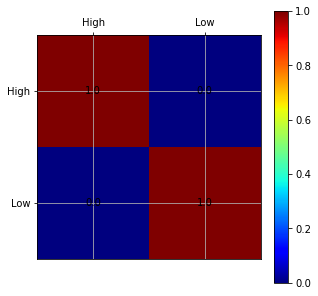


Test's observations:


,CLASS,avg_precision,std_precision,avg_recall,std_recall
0,High,1.0,0.0,1.0,0.0
1,Low,1.0,0.0,1.0,0.0


Test's visualizations:
confusion_matrix:


C:\Users\Barak\.conda\envs\DSEnv\lib\site-packages\automl_infrastructure\visualization\confusion_matrix.py:71: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)
C:\Users\Barak\.conda\envs\DSEnv\lib\site-packages\automl_infrastructure\visualization\confusion_matrix.py:101: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


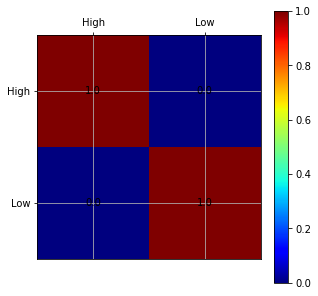



---------------------------------------------------------
Model name: rf.
Score: 0.5277777777777778.

Best hyper-parameters: {'max_depth': 4, 'n_estimators': 50}.

Train's observations:


,CLASS,avg_precision,std_precision,avg_recall,std_recall
0,High,1.0,0.0,1.0,0.0
1,Low,1.0,0.0,1.0,0.0



Train's visualizations:
confusion_matrix:


C:\Users\Barak\.conda\envs\DSEnv\lib\site-packages\automl_infrastructure\visualization\confusion_matrix.py:71: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)
C:\Users\Barak\.conda\envs\DSEnv\lib\site-packages\automl_infrastructure\visualization\confusion_matrix.py:101: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


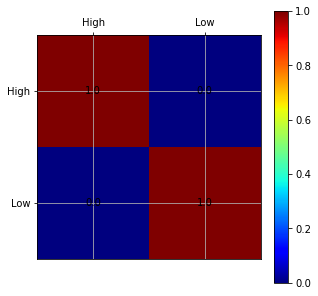


Test's observations:


,CLASS,avg_precision,std_precision,avg_recall,std_recall
0,High,0.411111,0.359355,0.5,0.408248
1,Low,0.533333,0.323179,0.7,0.355903


Test's visualizations:
confusion_matrix:


C:\Users\Barak\.conda\envs\DSEnv\lib\site-packages\automl_infrastructure\visualization\confusion_matrix.py:71: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)
C:\Users\Barak\.conda\envs\DSEnv\lib\site-packages\automl_infrastructure\visualization\confusion_matrix.py:101: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


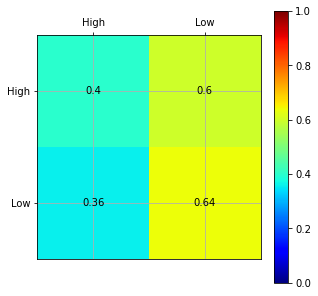



---------------------------------------------------------


In [5]:
# create models we want to examine
lr_model = SklearnClassifierAdapter(name='lr', sklearn_model=LogisticRegression())
rf_model = SklearnClassifierAdapter(name='rf', sklearn_model=RandomForestClassifier())

# declare hyper-params we want to optimize
hyper_parameters = {
    'rf': [ListParameter('max_depth', options=[2, 4, 6]), 
           ListParameter('n_estimators', options=[20, 50, 100])]
}

experiment = Experiment('experiment2', cords_df[features_cols], cords_df[label_col], 
                models=[lr_model, rf_model],
                hyper_parameters=hyper_parameters, 
                observations={
                    'avg_precision': Avg(metric='precision'),
                    'std_precision': Std(metric='precision'),
                    'avg_recall': Avg(metric='recall'),
                    'std_recall': Std(metric='recall')
                },
                visualizations={
                    'confusion_matrix': ConfusionMatrix(figsize=(5,5))
                },
                objective='accuracy'
            )

experiment.run(n_trials=20, n_jobs=1)
experiment.print_report(print_func=display)

# Complex Modeling & Evaluation With Hyper-Param Optimization

[I 2020-06-05 12:34:32,518] Finished trial#0 with value: 1.0 with parameters: {'C_04228': 0.5, 'C_08998': 0.1}. Best is trial#0 with value: 1.0.
[I 2020-06-05 12:34:32,782] Finished trial#1 with value: 1.0 with parameters: {'C_04228': 0.1, 'C_08998': 0.1}. Best is trial#0 with value: 1.0.
[I 2020-06-05 12:34:33,070] Finished trial#2 with value: 1.0 with parameters: {'C_04228': 0.5, 'C_08998': 0.5}. Best is trial#0 with value: 1.0.


Experiment's name: experiment1.
Start time: 09:34:32 - 05/06/20.
End time: 09:34:33 - 05/06/20.
Num of folds: 3.
Num of k-folds repetitions: 5.

---------------------------------------------------------
Model name: blending.
Score: 0.9833333333333333.

Best hyper-parameters: {'sub_lr1': {'C': 0.5}, 'sub_lr2': {'C': 0.1}}.

Train's observations:


,CLASS,avg_precision,avg_recall
0,High,1.0,1.0
1,Low,1.0,1.0



Train's visualizations:
confusion_matrix:


C:\Users\Barak\.conda\envs\DSEnv\lib\site-packages\automl_infrastructure\visualization\confusion_matrix.py:71: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)
C:\Users\Barak\.conda\envs\DSEnv\lib\site-packages\automl_infrastructure\visualization\confusion_matrix.py:101: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


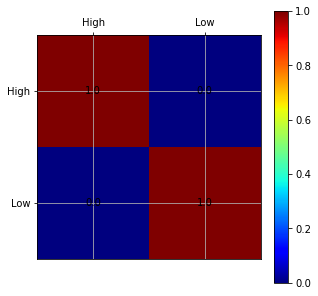


Test's observations:


,CLASS,avg_precision,avg_recall
0,High,0.977778,1.000000
1,Low,1.000000,0.966667


Test's visualizations:
confusion_matrix:


C:\Users\Barak\.conda\envs\DSEnv\lib\site-packages\automl_infrastructure\visualization\confusion_matrix.py:71: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)
C:\Users\Barak\.conda\envs\DSEnv\lib\site-packages\automl_infrastructure\visualization\confusion_matrix.py:101: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


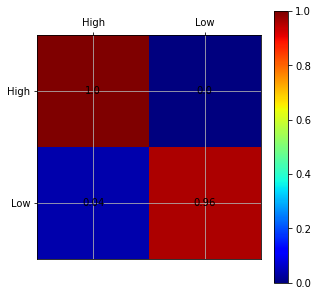



---------------------------------------------------------


In [6]:
# create models we want to examine
complex_blending_model = EnsembleClassifier(
    name='blending', 
    input_models=[SklearnClassifierAdapter(name='sub_lr1', sklearn_model=LogisticRegression()),
                  SklearnClassifierAdapter(name='sub_lr2', sklearn_model=LogisticRegression())],
    
    ensemble_model=SklearnClassifierAdapter(name='top_lr', sklearn_model=LogisticRegression())
    )

# declare hyper-params we want to optimize
hyper_parameters = {
    'blending':{
        'sub_lr1': [ListParameter('C', options=[0.1, 0.5])],
        'sub_lr2': [ListParameter('C', options=[0.1, 0.5])],
    }
}

experiment = Experiment('experiment1', cords_df[features_cols], cords_df[label_col], 
                models=[complex_blending_model], 
                hyper_parameters=hyper_parameters, 
                observations={
                    'avg_precision': Avg(metric='precision'),
                    'avg_recall': Avg(metric='recall')
                },
                visualizations={
                    'confusion_matrix': ConfusionMatrix(figsize=(5,5))
                },
                objective='accuracy'
            )

experiment.run(n_jobs=1)
experiment.print_report(print_func=display)